In [1]:
import shap
from sklearn.model_selection import train_test_split
shap.initjs()
#Census income dataset
X, y = shap.datasets.adult()
X_display, y_display = shap.datasets.adult(display=True)

In [2]:
## Drop most important feature in 2nd walkthrough
X = X.drop(columns="Capital Loss")
X = X.drop(columns="Capital Gain")
X.head()

,Age,Workclass,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Hours per week,Country
0,39.0,7,13.0,4,1,0,4,1,40.0,39
1,50.0,6,13.0,2,4,4,4,1,13.0,39
2,38.0,4,9.0,0,6,0,4,1,40.0,39
3,53.0,4,7.0,2,6,4,2,1,40.0,39
4,28.0,4,13.0,2,10,5,2,0,40.0,5


In [3]:
print(X.shape)
X.head()

(32561, 10)


,Age,Workclass,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Hours per week,Country
0,39.0,7,13.0,4,1,0,4,1,40.0,39
1,50.0,6,13.0,2,4,4,4,1,13.0,39
2,38.0,4,9.0,0,6,0,4,1,40.0,39
3,53.0,4,7.0,2,6,4,2,1,40.0,39
4,28.0,4,13.0,2,10,5,2,0,40.0,5


In [4]:
y

array([False, False, False, ..., False, False,  True])

In [5]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=7)
print("X_train : ",X_train.shape)
print("X_valid : ",X_valid.shape)


X_train :  (26048, 10)
X_valid :  (6513, 10)


In [9]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(10,)),
    tf.keras.layers.Dense(16),
    tf.keras.layers.Dense(2)
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 10)                0         
                                                                 
 dense_2 (Dense)             (None, 16)                176       
                                                                 
 dense_3 (Dense)             (None, 2)                 34        
                                                                 
Total params: 210 (840.00 Byte)
Trainable params: 210 (840.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.fit(X_train,y_train,epochs=5)

Epoch 1/5


2024-08-02 15:39:25.632175: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


814/814 [==============================] - 3s 3ms/step - loss: 1.0553 - accuracy: 0.7453
Epoch 2/5
814/814 [==============================] - 2s 3ms/step - loss: 0.4562 - accuracy: 0.7768
Epoch 3/5
814/814 [==============================] - 2s 3ms/step - loss: 0.4465 - accuracy: 0.7885
Epoch 4/5
814/814 [==============================] - 2s 3ms/step - loss: 0.4407 - accuracy: 0.7921
Epoch 5/5
814/814 [==============================] - 2s 3ms/step - loss: 0.4350 - accuracy: 0.7950


Here we use a selection of 50 samples from the dataset to represent “typical” feature values, and then use 500 perterbation samples to estimate the SHAP values for a given prediction. Note that this requires 500 * 50 evaluations of the model.

In [11]:
explainer = shap.KernelExplainer(model, X.iloc[:50, :])


shap_values = explainer.shap_values(X.iloc[299, :], nsamples=500)
print(shap_values.shape)


(10, 2)


In [12]:
explainer.expected_value

array([3.09216801, 1.91838201])

In [13]:
feature_index = 1
shap.force_plot(explainer.expected_value[feature_index] ,shap_values[:,feature_index])

In [14]:

shap_values50 = explainer.shap_values(X_valid[:50], nsamples=500)


  0%|          | 0/50 [00:00<?, ?it/s]

In [15]:
shap_values = explainer(X_valid[:50])

# set a display version of the data to use for plotting (has string values)
shap_values.display_data = shap.datasets.adult(display=True)[0].values

  0%|          | 0/50 [00:00<?, ?it/s]

In [16]:
shap_values.shape

(50, 10, 2)

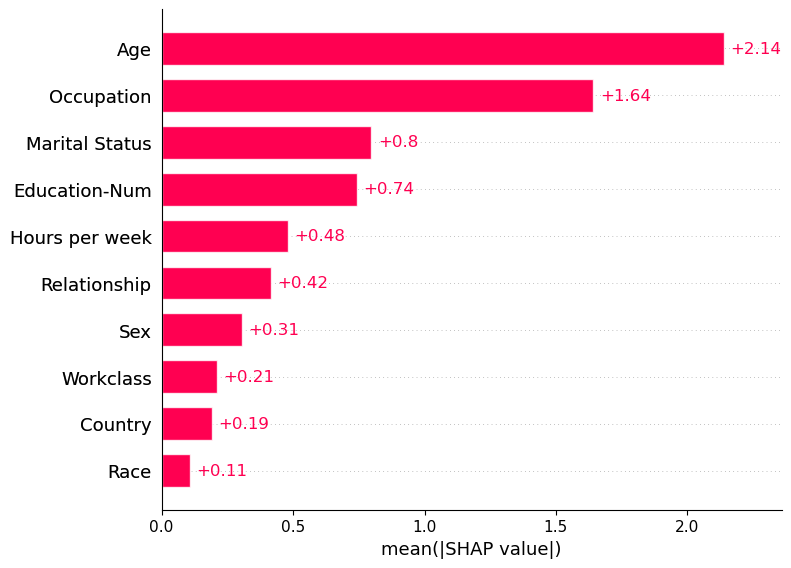

In [17]:
shap.plots.bar(shap_values[:,:,0])

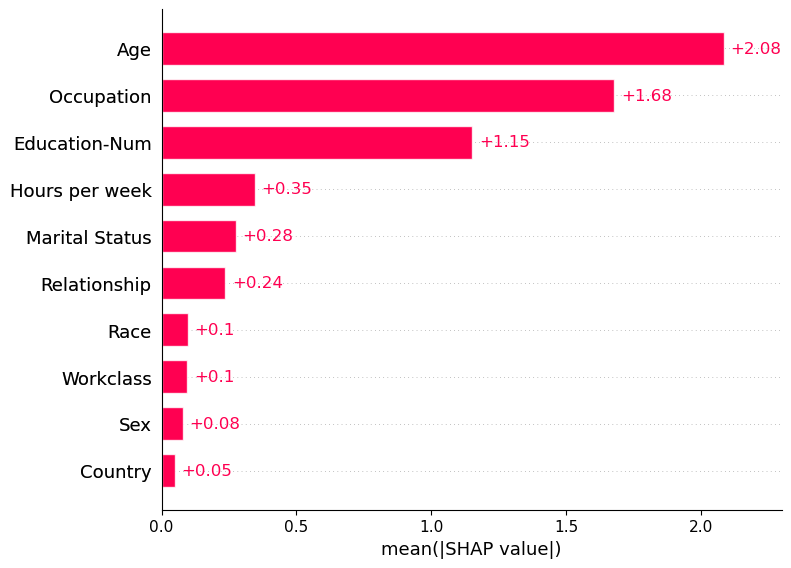

In [18]:
shap.plots.bar(shap_values[:,:,1])

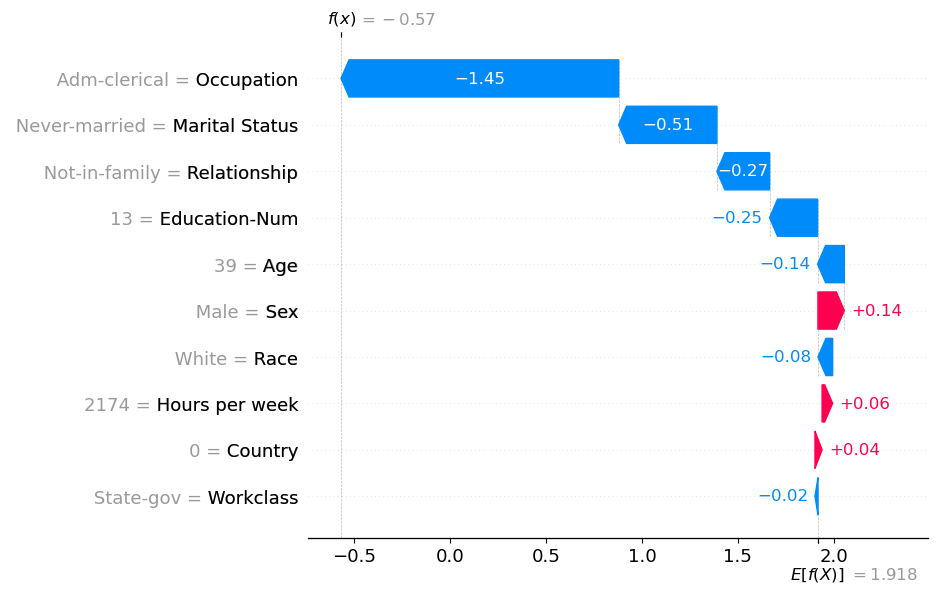

In [19]:
output_index = 1

sample_id = 0
shap.plots.waterfall(shap_values[sample_id,:,output_index], max_display=14)

In [20]:
shap_values.shape

(50, 10, 2)